<a href="https://colab.research.google.com/github/Saganero/machine-learning-bootcamp/blob/master/04_train_test_split.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns

np.random.seed(42)
np.set_printoptions(edgeitems=30, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set()
sklearn.__version__

'1.2.2'

In [3]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data_copy = raw_data.copy()
raw_data_copy.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(raw_data_copy['DESCR'])

In [5]:
data = raw_data_copy['data']
target = raw_data_copy['target']

print(f'{data[:5]}\n')
print(target[:5])

[[5.10 3.50 1.40 0.20]
 [4.90 3.00 1.40 0.20]
 [4.70 3.20 1.30 0.20]
 [4.60 3.10 1.50 0.20]
 [5.00 3.60 1.40 0.20]]

[0 0 0 0 0]


In [7]:
all_data = np.c_[data, target]
all_data[:5]

array([[5.10, 3.50, 1.40, 0.20, 0.00],
       [4.90, 3.00, 1.40, 0.20, 0.00],
       [4.70, 3.20, 1.30, 0.20, 0.00],
       [4.60, 3.10, 1.50, 0.20, 0.00],
       [5.00, 3.60, 1.40, 0.20, 0.00]])

In [16]:
df = pd.DataFrame(data = all_data, columns = raw_data.feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [18]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [21]:
df.describe().T.apply(lambda x: round(x,2))

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.06,0.44,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.76,1.77,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5
target,150.0,1.00,0.82,0.0,0.0,1.00,2.0,2.0


In [20]:
round(3.5555,2)

3.56

In [23]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

<Axes: ylabel='target'>

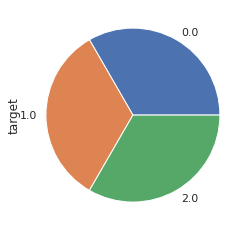

In [25]:
df.target.value_counts().plot(kind = 'pie')

In [26]:
data = df.copy()
target = data.pop('target')
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
target.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

Podział danych na zbiór treningowy i testory - iris data


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (112, 4)
y_train shape (112,)
X_test shape (38, 4)
y_test shape (38,)

Test ratio: 0.25

y_train:
1.0    39
2.0    38
0.0    35
Name: target, dtype: int64

y_test:
0.0    15
2.0    12
1.0    11
Name: target, dtype: int64
